In [1]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt  

import seaborn as sns

In [2]:
file_path = ("data/processed/ddos_train_data.csv")

data = pd.read_csv(file_path)

data.head()

C:\Users\Eric\AppData\Local\Temp\ipykernel_14664\3503835977.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,32452,172.16.0.5-192.168.50.1-1011-30217-17,172.16.0.5,1011,192.168.50.1,30217,17,2018-12-01 11:24:50.037167,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,41836,172.16.0.5-192.168.50.1-572-60094-17,172.16.0.5,572,192.168.50.1,60094,17,2018-12-01 12:14:22.545861,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP
2,2695,172.16.0.5-192.168.50.1-676-43803-17,172.16.0.5,676,192.168.50.1,43803,17,2018-12-01 10:38:56.749612,203,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NTP
3,103799,172.16.0.5-192.168.50.1-62478-10715-17,172.16.0.5,62478,192.168.50.1,10715,17,2018-12-01 13:49:26.909740,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
4,121183,172.16.0.5-192.168.50.1-35561-29716-17,172.16.0.5,35561,192.168.50.1,29716,17,2018-12-01 13:04:38.438546,104757,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP


In [3]:
data.columns = data.columns.str.strip()

In [4]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'data'

# Check for null values
null_counts = data.isnull().sum()
total_null = null_counts.sum()

print("Columns with null values:")
print(null_counts[null_counts > 0])
print(f"\nTotal number of null values: {total_null}")

# Calculate percentage of null values
null_percentage = (null_counts / len(data)) * 100

print("\nPercentage of null values in each column:")
print(null_percentage[null_percentage > 0])

# Remove rows with null values
data_cleaned = data.dropna()

# Print information about the cleaning process
rows_removed = len(data) - len(data_cleaned)
print(f"\nRows removed: {rows_removed}")
print(f"Percentage of data removed: {(rows_removed / len(data)) * 100:.2f}%")

# Update the original dataframe
data = data_cleaned

print(f"\nShape of dataframe after removing null values: {data.shape}")

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(data.head())

# Verify that there are no more null values
print("\nVerifying null values after cleaning:")
print(data.isnull().sum().sum())

Columns with null values:
Flow Bytes/s    65812
dtype: int64

Total number of null values: 65812

Percentage of null values in each column:
Flow Bytes/s    1.940387
dtype: float64

Rows removed: 65812
Percentage of data removed: 1.94%

Shape of dataframe after removing null values: (3325882, 88)

First few rows of the cleaned dataframe:
   Unnamed: 0                                 Flow ID   Source IP  \
0       32452   172.16.0.5-192.168.50.1-1011-30217-17  172.16.0.5   
1       41836    172.16.0.5-192.168.50.1-572-60094-17  172.16.0.5   
2        2695    172.16.0.5-192.168.50.1-676-43803-17  172.16.0.5   
3      103799  172.16.0.5-192.168.50.1-62478-10715-17  172.16.0.5   
4      121183  172.16.0.5-192.168.50.1-35561-29716-17  172.16.0.5   

   Source Port Destination IP  Destination Port  Protocol  \
0         1011   192.168.50.1             30217        17   
1          572   192.168.50.1             60094        17   
2          676   192.168.50.1             43803        17   
3 

In [5]:
features_to_remove = [
    'Unnamed: 0',  # This seems to be an index column
    'Flow ID',     # Unique identifier, not useful for prediction
    'Source IP',   # Specific network identifiers, not generalizable
    'Destination IP',
    'Timestamp',   # Time-specific information, may not be generalizable
    'SimillarHTTP', # Possibly misspelled, unclear relevance
    'Source Port',
    'Destination Port'
]

data = data.drop(columns=features_to_remove)

In [6]:
# Create binary labels
data['BinaryLabel'] = (data['Label'] != 'BENIGN').astype(int)

# Print the distribution
print(data['BinaryLabel'].value_counts(normalize=True))

BinaryLabel
1    0.982044
0    0.017956
Name: proportion, dtype: float64


In [7]:
# Remove rows with NaN or infinity values
data_cleaned = data.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Original shape: {data.shape}")
print(f"Shape after removing NaN and infinity rows: {data_cleaned.shape}")

Original shape: (3325882, 81)
Shape after removing NaN and infinity rows: (3266402, 81)


In [8]:
# Identify columns with only zeros
zero_columns = data_cleaned.columns[(data_cleaned == 0).all()].tolist()

# Remove these columns
data_cleaned = data_cleaned.drop(columns=zero_columns)

print(f"Columns removed (containing only zeros): {zero_columns}")
print(f"Shape after removing zero columns: {data_cleaned.shape}")

Columns removed (containing only zeros): ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Shape after removing zero columns: (3266402, 69)


In [9]:
from sklearn.feature_selection import mutual_info_classif

# Prepare features and target
X = data_cleaned.drop(['Label', 'BinaryLabel'], axis=1)
y_binary = data_cleaned['BinaryLabel']

# Calculate mutual information
mi_scores = mutual_info_classif(X, y_binary)

# Create a dataframe of features and their mutual information scores
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values('mi_score', ascending=False)

# Select top 30 features (you can adjust this number)
top_features = mi_df['feature'][:30].tolist()

# Create a new dataframe with selected features and binary label
selected_features = top_features + ['BinaryLabel']
data_selected = data_cleaned[selected_features]

print("\nSelected features:", selected_features)


Selected features: ['Flow Packets/s', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Fwd Packet Length Mean', 'Avg Fwd Segment Size', 'Average Packet Size', 'Fwd Packet Length Max', 'Inbound', 'Protocol', 'Fwd Packet Length Min', 'Min Packet Length', 'Flow Bytes/s', 'Init_Win_bytes_forward', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Bwd Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Std', 'Flow Duration', 'Packet Length Std', 'Packet Length Variance', 'Bwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd Header Length', 'Total Backward Packets', 'Subflow Bwd Packets', 'Bwd IAT Min', 'BinaryLabel']


In [10]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data_selected.drop('BinaryLabel', axis=1)
y = data_selected['BinaryLabel']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, stratify=y, random_state=42
)

print("\nData split sizes:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")



Data split sizes:
Training set: (2613121, 30)
Testing set: (653281, 30)


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (2613121, 1, 30)
Testing data shape: (653281, 1, 30)


In [14]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train is your training data
input_dim = X_train.shape[2]  # number of features
timesteps = X_train.shape[1]  # number of timesteps

# Define the autoencoder model
input_layer = Input(shape=(timesteps, input_dim))
encoded = LSTM(64, activation='relu')(input_layer)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, activation='relu', return_sequences=True)(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
autoencoder.fit(X_train, X_train, 
                epochs=50, 
                batch_size=32, 
                validation_split=0.2, 
                callbacks=[early_stopping],
                verbose=1)

print("Autoencoder trained successfully.")



Epoch 1/50

65328/65328 [==============================] - 138s 2ms/step - loss: 0.4964 - val_loss: 0.3904
Epoch 2/50
65328/65328 [==============================] - 161s 2ms/step - loss: 0.3930 - val_loss: 0.3750
Epoch 3/50
65328/65328 [==============================] - 337s 5ms/step - loss: 0.3601 - val_loss: 0.3306
Epoch 4/50
65328/65328 [==============================] - 280s 4ms/step - loss: 0.3529 - val_loss: 0.3294
Epoch 5/50
65328/65328 [==============================] - 287s 4ms/step - loss: 0.3453 - val_loss: 0.3322
Epoch 6/50
65328/65328 [==============================] - 287s 4ms/step - loss: 0.3289 - val_loss: 0.3330
Epoch 7/50
65328/65328 [==============================] - 286s 4ms/step - loss: 0.3955 - val_loss: 0.3232
Epoch 8/50
65328/65328 [==============================] - 289s 4ms/step - loss: 0.4138 - val_loss: 0.3063
Epoch 9/50
65328/65328 [==============================] - 291s 4ms/step - loss: 0.4236 - val_loss: 0.3273
Epoch 10/50
65328/65328 [==================

In [15]:
# Function to calculate reconstruction error
def get_reconstruction_error(autoencoder, data):
    predictions = autoencoder.predict(data)
    mse = np.mean(np.power(data - predictions, 2), axis=(1,2))
    return mse

# Get reconstruction errors for training and test data
train_errors = get_reconstruction_error(autoencoder, X_train)
test_errors = get_reconstruction_error(autoencoder, X_test)

print("Reconstruction errors calculated.")

20416/20416 [==============================] - 113s 6ms/step
Reconstruction errors calculated.


In [16]:
# Add reconstruction error as a new feature
X_train_with_error = np.column_stack((X_train.reshape(X_train.shape[0], -1), train_errors))
X_test_with_error = np.column_stack((X_test.reshape(X_test.shape[0], -1), test_errors))

print("New feature (reconstruction error) added to the datasets.")
print(f"Shape of training data with new feature: {X_train_with_error.shape}")
print(f"Shape of test data with new feature: {X_test_with_error.shape}")

New feature (reconstruction error) added to the datasets.
Shape of training data with new feature: (2613121, 31)
Shape of test data with new feature: (653281, 31)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Adjust input shape to include the new feature
input_shape = (X_train_with_error.shape[1], 1)

# Define the RNN model
rnn_model = Sequential([
    Input(shape=input_shape),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
history = rnn_model.fit(X_train_with_error.reshape(-1, input_shape[0], 1), y_train, 
                        epochs=10, 
                        batch_size=32, 
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)

print("RNN model trained with the new feature.")

Epoch 1/10

65328/65328 [==============================] - 5105s 78ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 2/10
65328/65328 [==============================] - 2126s 33ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 3/10
65328/65328 [==============================] - 3643s 56ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 4/10
65328/65328 [==============================] - 22151s 339ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 5/10
65328/65328 [==============================] - 1981s 30ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 6/10
65328/65328 [==============================] - 2023s 31ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 7/10
65328/65328 [==============================] - 4441s 68ms/step - loss: 0.0014 - accura

In [20]:
# Save the entire model
rnn_model.save('anomallyrnnlstmmodel.keras')

print("Model saved successfully.")

Model saved successfully.


In [22]:
# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test_with_error.reshape(-1, input_shape[0], 1), y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = rnn_model.predict(X_test_with_error.reshape(-1, input_shape[0], 1))
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

Test Loss: 0.0014
Test Accuracy: 0.9996
20416/20416 [==============================] - 325s 16ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11874
           1       1.00      1.00      1.00    641407

    accuracy                           1.00    653281
   macro avg       0.99      1.00      0.99    653281
weighted avg       1.00      1.00      1.00    653281



High Performance: The model shows excellent performance with an accuracy of 99.96%. This is extremely high and indicates that the model is very good at distinguishing between normal traffic and DDoS attacks.
Balanced Performance: The model performs well on both classes. It's particularly strong in identifying DDoS attacks (Class 1) with perfect precision and recall.
Slight Improvement in Normal Traffic Detection: For Class 0 (Normal Traffic), the precision is 0.98, which is very good. The recall of 1.00 suggests that the model is not missing any normal traffic instances.
Low False Positive Rate: The high precision for Class 0 (0.98) indicates a low false positive rate, which is crucial in a real-world scenario to avoid unnecessary alarms.

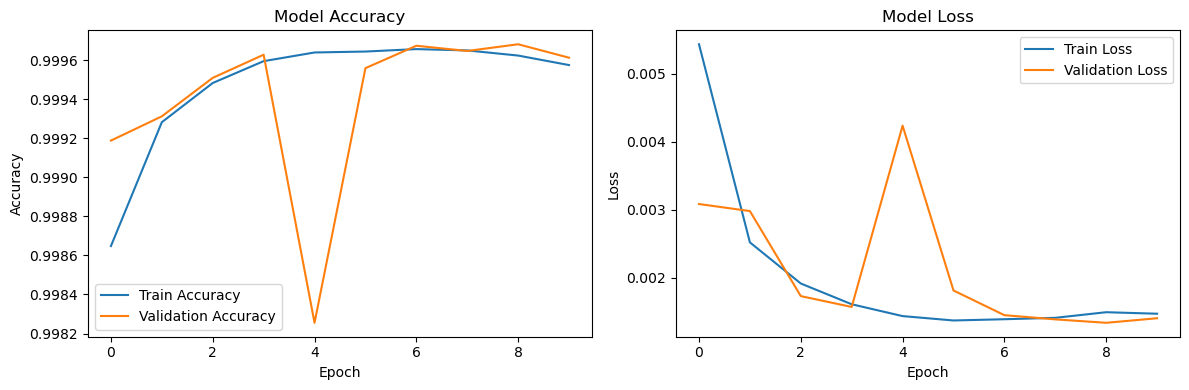

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

High Initial Performance: The model starts with very high accuracy, suggesting that the features (including the new autoencoder feature) are highly informative for DDoS detection.
Consistent Improvement: Both accuracy and loss improve over time, indicating that the model is learning effectively from the data.
Good Generalization: The close tracking of training and validation metrics suggests the model is generalizing well and not overfitting to the training data.
Quick Recovery: The model quickly recovers from the temporary performance dip around epoch 4, demonstrating resilience in learning

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_classes are already defined
cm = confusion_matrix(y_test, y_pred_classes)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate additional metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)

# Print results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1_score:.4f}")

True Negatives (TN): 11832
False Positives (FP): 42
False Negatives (FN): 213
True Positives (TP): 641194

Accuracy: 0.9996
Precision: 0.9999
Recall (Sensitivity): 0.9997
Specificity: 0.9965
F1-score: 0.9998


True Negatives (TN): 11,832

These are correctly identified normal traffic instances.
This indicates your model is good at recognizing normal network behavior.


False Positives (FP): 42

These are normal traffic instances incorrectly flagged as DDoS attacks.
While low, these could lead to unnecessary alerts or actions in a real system.


False Negatives (FN): 213

These are DDoS attacks that the model failed to detect.
This is the most concerning metric, as missed attacks could be harmful.


True Positives (TP): 641,194

Correctly identified DDoS attacks.
The high number shows the model is very effective at detecting attacks.


Accuracy: 0.9996 (99.96%)

Overall, the model is correct 99.96% of the time, which is excellent.


Precision: 0.9999 (99.99%)

Out of all instances the model flagged as attacks, 99.99% were actual attacks.
This indicates very few false alarms.


Recall (Sensitivity): 0.9997 (99.97%)

The model detected 99.97% of all actual DDoS attacks in the dataset.
This high recall is crucial for a security system.


Specificity: 0.9965 (99.65%)

The model correctly identified 99.65% of normal traffic.
Slightly lower than recall, but still very good.


F1-score: 0.9998 (99.98%)

This balanced measure of precision and recall is extremely high.

Overall Performance: The model shows excellent performance across all metrics.
Class Imbalance: There's a significant imbalance (11,874 normal vs 641,407 attack instances). Despite this, the model performs well on both classes.
False Negatives: While low (213), these are the most concerning errors. In a real-world scenario, these represent undetected attacks.
False Positives: Also low (42), these could lead to some unnecessary alerts but are manageable.
Precision vs Recall: The model has slightly higher precision than recall, indicating it's marginally more likely to miss an attack than to raise a false alarm.